<a href="https://colab.research.google.com/github/jubaer-404/Random-ML-Projects/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [79]:
housing_data = pd.read_csv('/content/1553768847-housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [80]:
housing_data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [81]:
housing_data['ocean_proximity']=housing_data['ocean_proximity'].replace({
    '<1H OCEAN' : 1,
    'INLAND' : 2,
    'NEAR OCEAN' : 3,
    'NEAR BAY' : 4,
    'ISLAND' : 5
})

<ipython-input-81-d266610340ba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_data['ocean_proximity']=housing_data['ocean_proximity'].replace({


In [82]:
housing_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [83]:
          housing_data_cleaned = housing_data.dropna()
          housing_data_cleaned.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [84]:
housing_data_cleaned.shape

(20433, 10)

In [85]:
housing_data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,1.909411,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,1.004574,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,1.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,1.000000,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,2.000000,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,2.000000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,5.000000,500001.000000


Understanding corelation

<Axes: >

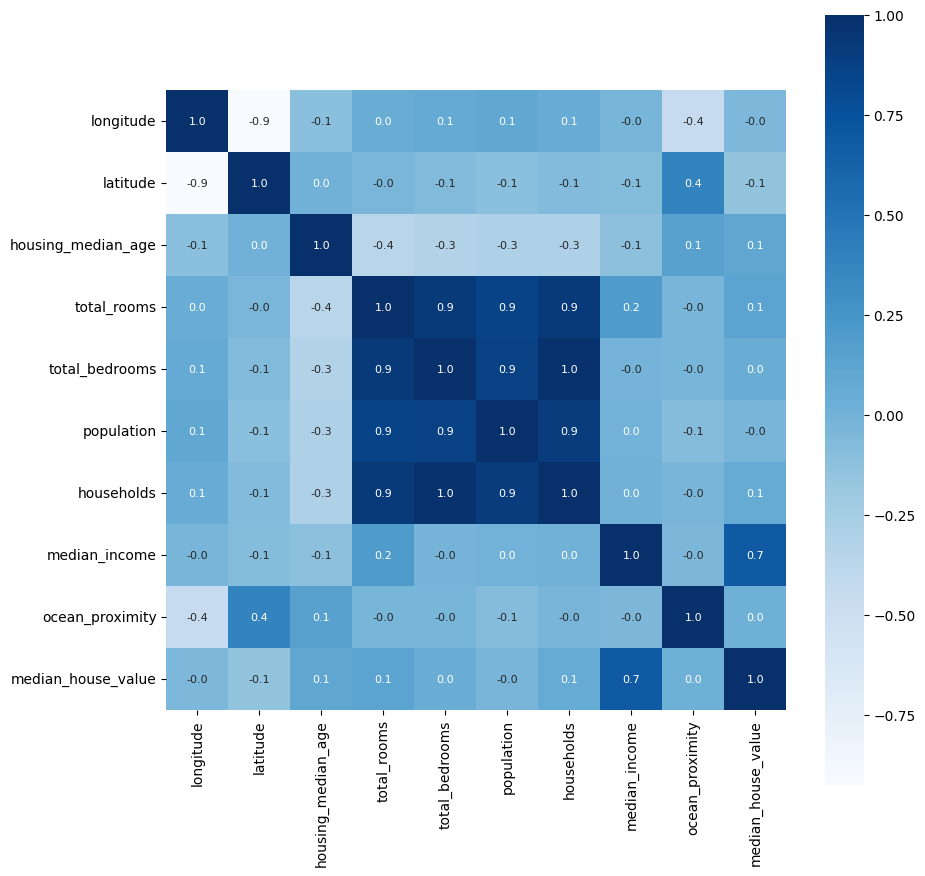

In [86]:

#corelation = housing_data_cleaned.drop('ocean_proximity', axis=1)
corl= housing_data_cleaned.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corl, cbar = True, square=True, fmt='0.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [87]:
X = housing_data_cleaned.drop(['median_house_value'], axis=1)
Y = housing_data_cleaned['median_house_value']
print(X)
print(Y)

       longitude  latitude  ...  median_income  ocean_proximity
0        -122.23     37.88  ...         8.3252                4
1        -122.22     37.86  ...         8.3014                4
2        -122.24     37.85  ...         7.2574                4
3        -122.25     37.85  ...         5.6431                4
4        -122.25     37.85  ...         3.8462                4
...          ...       ...  ...            ...              ...
20635    -121.09     39.48  ...         1.5603                2
20636    -121.21     39.49  ...         2.5568                2
20637    -121.22     39.43  ...         1.7000                2
20638    -121.32     39.43  ...         1.8672                2
20639    -121.24     39.37  ...         2.3886                2

[20433 rows x 9 columns]
0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Leng

Data Standardization

In [88]:
# scaler = StandardScaler()
# scaler.fit(X)

In [89]:
# X = scaler.transform(X)
# Y = housing_data_cleaned['median_house_value']
# print(X)
# print(Y)

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(20433, 9) (16346, 9) (4087, 9)


Model Training

In [91]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [92]:
from sklearn.metrics import mean_absolute_error
baseline_pred = [Y_train.mean()] * len(Y)
mae_baseline = mean_absolute_error(Y, baseline_pred)
print(mae_baseline)

91268.94100398583


So, MAE must be much lower than 91268.94

With Training Values

In [93]:
# With training values
housing_data_cleaned_prediction = model.predict(X_train)
print(housing_data_cleaned_prediction)

[ 78485.14 475569.3  375218.72 ... 132545.62 170836.31 125069.42]


In [94]:
# Compare predicted data with Y_train
score_1 = metrics.r2_score(Y_train, housing_data_cleaned_prediction)
print('R squared value = ', score_1)
score_2 = metrics.mean_absolute_error(Y_train, housing_data_cleaned_prediction)
print('Mean Absolute Error = ', score_2)

R squared value =  0.9384356141090393
Mean Absolute Error =  20294.09765625


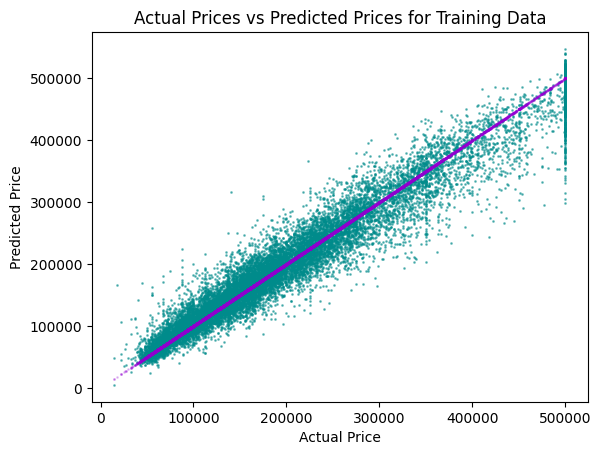

In [95]:
plt.scatter(Y_train, housing_data_cleaned_prediction, color='darkcyan', alpha=0.5, s=1)
plt.scatter(Y_train,Y_train,color='darkviolet', alpha=0.2, s=1)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices for Training Data')
plt.show()

With Test Values

In [96]:
# With test values
housing_data_cleaned_prediction_test = model.predict(X_test)
print(housing_data_cleaned_prediction_test)

[126568.76   94131.086 232453.38  ... 224902.88  139717.19  405083.53 ]


In [97]:
# Compare predicted data with Y_train
score_3 = metrics.r2_score(Y_test, housing_data_cleaned_prediction_test)
print('R squared value = ', score_3)
score_4 = metrics.mean_absolute_error(Y_test, housing_data_cleaned_prediction_test)
print('Mean Absolute Error = ', score_4)

R squared value =  0.8248375058174133
Mean Absolute Error =  31850.47265625


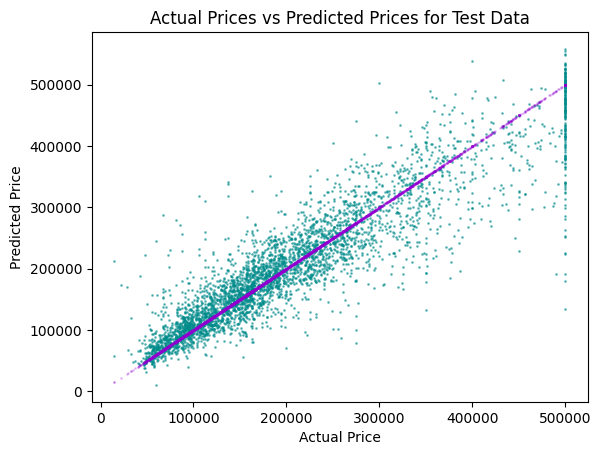

In [98]:
plt.scatter(Y_test, housing_data_cleaned_prediction_test, color='darkcyan', alpha=0.5, s=1)
plt.scatter(Y_test, Y_test, color='darkviolet', alpha=0.2, s=1)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices for Test Data')
plt.show()

Taking input from user

    '<1H OCEAN' : 1,
    'INLAND' : 2,
    'NEAR OCEAN' : 3,
    'NEAR BAY' : 4,
    'ISLAND' : 5

In [101]:
input = (-120.55,38.31,18,1411,312,592,230,1.625,2)
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)


[98293.31]
